This tutorial is developed for illustrating the use of PyTorch and training/testing deep learning models.

The tutorial is adapted by Muchao Ye and used in UI CS:4420.

**Important Note**: This code is tailored for being run on terminals provided by Google Colab.

<div class="markdown-google-sans">
  <h2>Part 1: What is PyTorch?</h2>
</div>

Pytorch is a popular neural net framework with the following features:
*   Libraries of algorithms and network primitives. Provides a high-level abstractions for working with neural networks.
*   Support for graphics processing units (GPU)


We will learn the basics of using PyTorch for machine learning. We will cover the following topics:

1. Tensors
2. Gradient Computation
3. Building a simple neural network
4. PyTorch Datasets and DataLoaders
5. Visualizing examples from the FashionMNIST Dataset
6. Training on GPU
7. Using pre-trained weights

## 1. Tensors
Tensors are a specialized data structure very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model's parameters.

Tensors are similar to NumPy's ndarrays, except that tensors can run on GPUs or other hardware accelerators.

### Initializing a Tensor

In [ ]:
# Import the necessary library
import torch
import numpy as np
import math

# Create a tensor directly from data
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print("x:", x)

# Create a tensor of zeros
y = torch.zeros(2, 2)
print("y:", y)

# Create a tensor of ones
z = torch.ones(2, 2)
print("z:", z)

# Create a random tensor
w = torch.rand(2, 2)
print("w:", w)

# Create a tensor from a NumPy array
np_array = np.array([1,2,3])
x_np = torch.from_numpy(np_array)
print("x_np:", x_np)

x: tensor([[1., 2.],
        [3., 4.]])
y: tensor([[0., 0.],
        [0., 0.]])
z: tensor([[1., 1.],
        [1., 1.]])
w: tensor([[0.9851, 0.9471],
        [0.2760, 0.0418]])
x_np: tensor([1, 2, 3])


### Attributes of a tensor


In [2]:
tensor = torch.tensor([[1, 2, 3], [3, 4, 5]])

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([2, 3])
Datatype of tensor: torch.int64
Device tensor is stored on: cpu


### Operations on Tensors



In [3]:
# Move the tensor to GPU if available
if torch.cuda.is_available():
  tensor = tensor.to("cuda")

# Standard numpy-like indexing and slicing
tensor = torch.tensor([[1,2,3], [3,4,5]])
print("First row: ", tensor[0])
print("First column: ", tensor[:,0])

First row:  tensor([1, 2, 3])
First column:  tensor([1, 3])


In [4]:
# Matrix multiplication
tensor = torch.ones(3, 3)
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
print("y1: ", y1)
print("y2: ", y2)

y1:  tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])
y2:  tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])


In [5]:
# Element wise product
z1 = tensor * tensor
z2 = tensor.mul(tensor)
print("z1: ", z1)
print("z2: ", z2)

z1:  tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
z2:  tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [6]:
# common functions
a = torch.rand(2, 4) * 2 - 1
print('Matrix a')
print(a)
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

# Reshape
a_reshaped = torch.reshape(a, (4, 2))
b = torch.tensor([[0, 1], [2, 3]])
b_reshaped =torch.reshape(b, (-1,))
print("a_reshaped", a_reshaped)
print("b_reshaped", b_reshaped)

Matrix a
tensor([[-0.4502,  0.2378,  0.0281, -0.3422],
        [-0.2300,  0.0242, -0.2591,  0.1960]])
Common functions:
tensor([[0.4502, 0.2378, 0.0281, 0.3422],
        [0.2300, 0.0242, 0.2591, 0.1960]])
tensor([[-0., 1., 1., -0.],
        [-0., 1., -0., 1.]])
tensor([[-1.,  0.,  0., -1.],
        [-1.,  0., -1.,  0.]])
tensor([[-0.4502,  0.2378,  0.0281, -0.3422],
        [-0.2300,  0.0242, -0.2591,  0.1960]])
a_reshaped tensor([[-0.4502,  0.2378],
        [ 0.0281, -0.3422],
        [-0.2300,  0.0242],
        [-0.2591,  0.1960]])
b_reshaped tensor([0, 1, 2, 3])


### Tensor Broadcasting

In [7]:
x1 = torch.tensor([[1, 2, 3], [3, 4, 5]])
x2 = torch.tensor([2,2,2])
doubled = x1 * x2

print(doubled)

tensor([[ 2,  4,  6],
        [ 6,  8, 10]])


## 2. Gradient Computation
To compute the gradients of the loss function, PyTorch has a built-in differentiation engine called `torch.autograd` that traces the computation dynamically at runtime. It supports automatic computation of gradient for any computational graph.

- In the forward pass, `torch.autograd` runs the requested operation to compute the resulting tensor. For each primitive operation, data and the operation's gradient function are stored in the computation graph.
- In the backward pass, `torch.autograd` computes the gradients using the gradient function of each primitive operation and accumulates gradients using chain rule.



Consider the one-layer neural network below:

In [8]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

# Forward Pass
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

The code above defines the following computation graph:

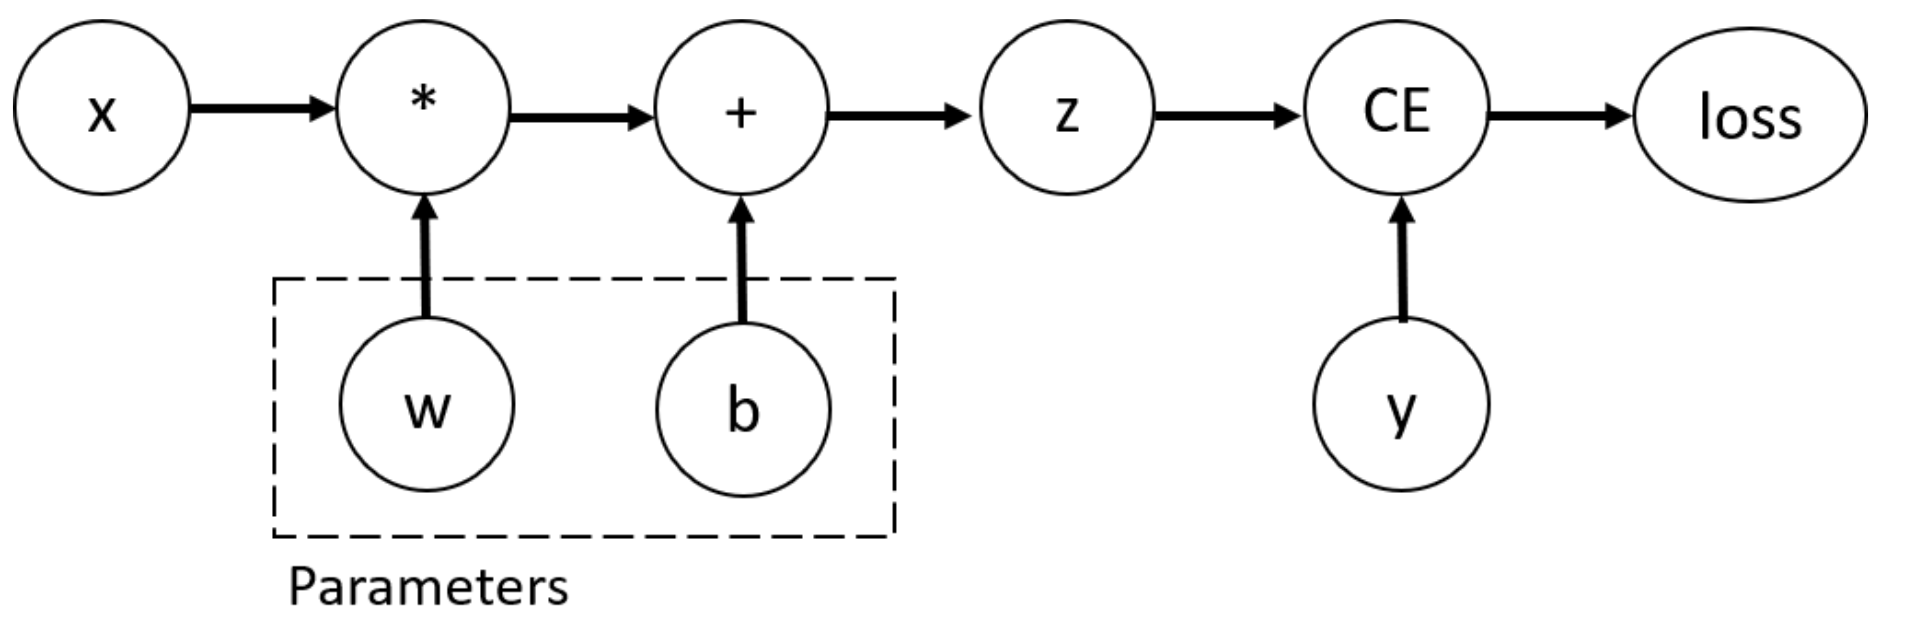

Image source: https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

We need to be able to compute the gradients of the loss function with respect to the variables `w `and `b`, so we've set the `requires_grad` property of those tensors.

**Computing Gradients**: To compute `dw`, `db`, we call `loss.backward()` and retrieve the values from `w.grad` and `b.grad`.


In [9]:
# Backward Pass
loss.backward()
# Get the gradient by just call .grad for each variables
# We can see the gradients have the same shape as the variables
print(w.grad)
print(b.grad)

tensor([[0.1730, 0.1351, 0.0370],
        [0.1730, 0.1351, 0.0370],
        [0.1730, 0.1351, 0.0370],
        [0.1730, 0.1351, 0.0370],
        [0.1730, 0.1351, 0.0370]])
tensor([0.1730, 0.1351, 0.0370])


Note that we haven't set the `requires_grad` True for variable `x`. We don't get the gradient during the backward pass. And here is the evidence.




In [10]:
print(x.grad)

None


Now let's rerun the code again with setting `requires_grad` True for variable `x`.

In [11]:
import torch

x = torch.ones(5, requires_grad=True)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

# Forward Pass
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

This time we can get the gradient for the input. This is what essentially happens in white-box adversarial attacks. Based on the loss we get in testing, we compute the gradient of the loss function with respect to the input.

In [12]:
# Backward Pass
loss.backward()

print(x.grad)

tensor([-0.0440,  0.1421, -0.1880,  0.0562,  0.0072])


**Disabling gradient tracking** : When we have trained the model and just want to run inference on the test data, we only want to do forward computations through the network. We can stop tracking computations by surrounding our computation code with `torch.no_grad()` block. This will help reducing memory consumption for computations. Another case where you might want to disable gradient tracking is to mark some parameters in the neural network as frozen parameters.

In [13]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


## 3. Building a simple neural network

We now build a neural network by our own. In PyTorch, to build a machine learning model, we need to define it by inheriting the class of `nn.Module`. There are two methods we need to define:
*   `__init__`: This method initializes the layers of the neural network.
Here, we create two fully connected layers using `nn.Linear`. `input_size` is the number of input features, `hidden_size` is the number of neurons in the hidden layer, and `output_size` is the number of output classes or values.

*   `forward`: This is method defines how the input data passes through the network in the forward pass. We apply the first linear transformation and then use a ReLU activation function with `torch.relu`. Finally, we apply the second linear transformation to produce the output.

In [14]:
# Create an instance of the neural network
import torch.nn as nn
import torch.optim as optim

input_size = 2
hidden_size = 8
output_size = 1

# Define the neural network: it only has one hidden layer and output layer
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=False)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = SimpleNet()

With a given neural network, when we train the model, we need to define the loss function and optimizer. They focus two important perspective for forward and backward passes
*   Loss Function: How good the model is doing in the forward pass?
*   Optimizer:  How to update the model parameter in the backward pass?


Note one important thing here: when we start the backward passes, we first zero the gradients in the `optimizer` by `optimizer.zero_grad()`. This is a must-to-do to delete previous gradient.

After that, we do backward passes, by calculating the gradient with `loss.backward()` and update the model parameters with `optimizer.step()`.


In [15]:
print(net)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Prepare some dummy data and labels
data = torch.tensor([[1., 2.], [3., 4.]], dtype=torch.float32)
labels = torch.tensor([[0.], [1.]], dtype=torch.float32)

# Train the neural network
for epoch in range(500):
    # Forward pass
    outputs = net(data)
    loss = criterion(outputs, labels)

    # IMPORTANT: Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()
    optimizer.step()

    # Print the loss for this epoch
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{500}], Loss: {loss.item():.4f}")


SimpleNet(
  (fc1): Linear(in_features=2, out_features=8, bias=False)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)
Epoch [100/500], Loss: 0.0999
Epoch [200/500], Loss: 0.0665
Epoch [300/500], Loss: 0.0431
Epoch [400/500], Loss: 0.0274
Epoch [500/500], Loss: 0.0171


## 4. PyTorch Datasets and DataLoaders

We have covered three important elements in training a neural network: network structure, loss function, and optimizer. Now we need to cover the last essential piece in training a neural network: Dataset/Dataloader.

Datasets and DataLoaders are essential components for handling data in PyTorch. A Dataset is a collection of data, and a DataLoader helps to efficiently load the data in batches during training. PyTorch has provided some built-in modules for us to use for defining dataset and dataloader objects.

**Tips**: There are a lot of datasets in PyTorch Datasets (https://pytorch.org/vision/0.8/datasets.html). Just use them!

In this example, we'll use the FashionMNIST dataset, which contains 60,000 training images and 10,000 testing images of 10 different clothing items.

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader

# Define data transformations
transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the FashionMNIST dataset
full_train_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform
)

# Split full_train_dataset into training and validation sets (80%/20%)
train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False, num_workers=2)

print(f"Train: {len(train_dataset)} | Val: {len(val_dataset)} | Test: {len(test_dataset)}")


100%|██████████| 26.4M/26.4M [00:01<00:00, 19.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 296kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.48MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.1MB/s]


Train: 48000 | Val: 12000 | Test: 10000


## 5. Visualizing Examples from the FashionMNIST Dataset


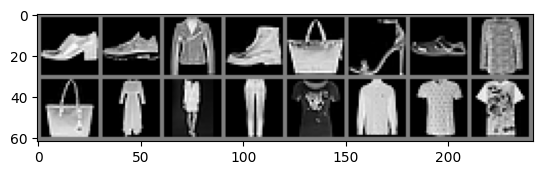

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Function to unnormalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Display the images in a grid along with their labels
imshow(torchvision.utils.make_grid(images[:16]))

With the dataset loaded and the DataLoader created, we can now train our neural network using the FashionMNIST dataset. Let's modify our previous SimpleNet example to handle 28x28 images and 10 output classes.

We need 2 extra modules here to handle image data:
* `nn.Conv2d`: Convolutional layer for 2-dimensional data.
* `nn.Conv2d`: Maxpooling layer for 2-dimensional data.



We can break down the neural network as follows.
1. self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)

    Purpose: This line defines the first convolutional layer.
    Parameters:
        1: The number of input channels (e.g., grayscale images have 1 channel, RGB images have 3).
        16: The number of output channels (filters) this layer will produce.
        3: The size of the filter (kernel), which is 3x3 pixels.
        1: The padding size
    Function: This layer applies 16 different 3x3 filters to the input image, producing a feature map that highlights various patterns.

2. self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    Purpose: This line defines a max pooling layer.
    Parameters:
        2: The size of the window to take the max over (2x2).
        2: The stride (the step size) to move the window (2 pixels).
    Function: This layer reduces the spatial dimensions of the feature maps by taking the maximum value in each 2x2 window, effectively downsampling the feature maps and retaining the most significant features.

3. self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

    Purpose: This line defines the second convolutional layer.
    Parameters:
        16: The number of input channels (the output from the first convolutional layer).
        32: The number of output channels (filters) this layer will produce.
        3: The size of the filter (kernel), which is again 3x3 pixels.
        1: The padding size
    Function: Similar to the first convolutional layer, this layer applies 32 different 3x3 filters to the input from the previous layer, generating more complex feature maps.

4. self.fc1 = nn.Linear(in_features=32 * 7 * 7, out_features=128)

    Purpose: This line defines the first fully connected (linear) layer.
    Parameters:
        32 * 7 * 7: The input size. After the convolutions and pooling, the feature maps' spatial dimensions are reduced (assuming the input size is compatible). This value represents the flattened size of the output from the last convolutional layer. You may need to adjust this based on the input size and the layer configurations.
        128: The number of output neurons in this layer.
    Function: This layer connects all the neurons from the previous layer to 128 neurons, enabling the network to learn complex representations.

5. self.fc2 = nn.Linear(in_features=128, out_features=64)

    Purpose: This line defines the second fully connected layer.
    Parameters:
        128: The input size, which is the number of neurons from the previous layer.
        64: The number of output neurons in this layer.
    Function: This layer connects all the neurons from the previous layer to 64 neurons, further refining the learned features.

6. self.fc3 = nn.Linear(in_features=64, out_features=10)

    Purpose: This line defines the final fully connected layer.
    Parameters:
        64: The input size, which is the number of neurons from the previous layer.
        10: The number of output neurons in this layer. Typically, this corresponds to the number of classes for a classification problem (e.g., 10 classes for digit recognition).
    Function: This layer produces the final output of the network, which can be interpreted as the class scores for classification tasks.

Overall, this snippet builds a simple CNN architecture that consists of: Two convolutional layers for feature extraction. A max pooling layer to downsample the feature maps.Three fully connected layers to learn complex representations and output class scores.

In [19]:
import torch.nn.functional as F

# Define the neural network for FashionMNIST
class FashionMNISTNet(nn.Module):
    def __init__(self):
        super(FashionMNISTNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(in_features=32 * 7 * 7, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# IMPORTANT CODE BELOW
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Create an instance of the neural network
net = FashionMNISTNet()
print(net)

# Move the model to the GPU if available
net.to(device)


# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)

# saving the model with the best validation accuracy
best_val_acc = 0.0
best_model_path = "best_fashionmnist_model.pth"


# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / (i + 1)

    # --- Validation ---
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_acc = 100 * correct / total

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(net.state_dict(), best_model_path)
        print(f"✅ New best model saved with val acc: {val_acc:.2f}%")

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Val Acc: {val_acc:.2f}%")

print("Training finished.")
print(f"Best Validation Accuracy: {best_val_acc:.2f}%")

Using device: cpu
FashionMNISTNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
✅ New best model saved with val acc: 68.43%
Epoch [1/5], Loss: 1.6320, Val Acc: 68.43%
✅ New best model saved with val acc: 77.73%
Epoch [2/5], Loss: 0.7339, Val Acc: 77.73%
✅ New best model saved with val acc: 81.48%
Epoch [3/5], Loss: 0.5665, Val Acc: 81.48%
Epoch [4/5], Loss: 0.4989, Val Acc: 78.28%
✅ New best model saved with val acc: 81.87%
Epoch [5/5], Loss: 0.4543, Val Acc: 81.87%
Training finished.
Best Validation Accuracy: 81.87%


Now that we have trained our neural network, let's evaluate its performance on the test dataset.

In [20]:
# Test the neural network
correct = 0
total = 0

# Load the saved model and Set the model to evaluation mode
net.load_state_dict(torch.load("best_fashionmnist_model.pth"))
net.eval()

# Disable gradient calculation
with torch.no_grad():
    for inputs, labels in test_loader:

        # Move the inputs and labels to the GPU if available
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = net(inputs)

        # Get the predicted class
        _, predicted = torch.max(outputs.data, 1)

        # Update the total number of samples and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate the accuracy
accuracy = 100 * correct / total
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 80.74%


Not bad!

Let's inspect number of total parameters and training parameters in the model:

In [21]:
total_params = sum(p.numel() for p in net.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in net.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

214,538 total parameters.
214,538 training parameters.


## 8. Pre-trained weights

PyTorch has many pretrained models we can use. All of these models have been trained on Imagenet which consists of millions of images across 1000 categories. We want to freeze the early layers of these pretrained models and replace the classification module with our own.


PyTorch API for using pre-trained weights: https://pytorch.org/vision/stable/models.html

The approach for using a pre-trained image recognition model is well-established:

1. Load in pre-trained weights from a network trained on a large dataset
2. Freeze all the weights in the lower (convolutional) layers
    * Layers to freeze can be adjusted depending on similarity of task to large training dataset
3. Replace the classifier (fully connected) part of the network with a custom classifier
    * Number of outputs must be set equal to the number of classes
4. Train only the custom classifier (fully connected) layers for the task
    * Optimizer model classifier for smaller dataset


We will demonstrate an example of loading a pre-trained Resnet model.

In [22]:
from torchvision import models

# Just use the model from torchvision without coding by ourselves
model = models.resnet50(pretrained=True)
# we can use all the pretrained models provided by pytorch (https://pytorch.org/vision/main/models.html)
# model = models.alexnet(pretrained=True)
# model = models.vgg16(pretrained=True)
# model = models.vgg19(pretrained=True)
# model = models.resnet101(pretrained=True)
# model = models.resnet152(pretrained=True)

print(model)

for param in model.parameters():
    param.requires_grad = False

n_inputs = model.fc.in_features
n_classes = 10
model.fc = nn.Sequential(
    nn.Linear(n_inputs, 256), nn.ReLU(), nn.Dropout(0.2),
    nn.Linear(256, n_classes), nn.LogSoftmax(dim=1))

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 149MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

<div class="markdown-google-sans">
  <h2>Part 3: Training ResNet with Tiny ImageNet</h2>
</div>

We will illustrate the process of training a ResNet with Tiny ImageNet data with the following codes. We generally have the following steps for coding the training process:


*   Download Data
*   Define Data Processing
*   Define Data Loader
* Define Model
* Define Loss and Optmizer
* Training Loop (Forward & Backward Passes)


In this example, we use Tiny ImageNet as an example for the data we want to use. Tiny ImageNet is a small part of ImageNet dataset. It contains 100000 images of 200 classes (500 for each class) downsized to 64×64 colored images. Each class has 500 training images, 50 validation images and 50 test images.

If we don't have this dataset in our storage, we can download it from the following URL link.

In [26]:
# Retrieve data directly from Stanford data source
# Exclamation mark is to make Colab read the code as an linux command
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2025-04-07 15:37:57--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.64.64
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.64.64|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cs231n.stanford.edu/tiny-imagenet-200.zip [following]
--2025-04-07 15:37:57--  https://cs231n.stanford.edu/tiny-imagenet-200.zip
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  5.80MB/s    in 38s     

2025-04-07 15:38:35 (6.26 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



If we have the data downloaded, we can put it in the Google Drive, and load it directly with the followining package.

In [23]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


We may just have the zip file in the Google Drive. Remember to unzip it if necessary.

In [27]:
!unzip drive/MyDrive/data/tiny-imagenet-200.zip

Streaming output truncated to the last 5000 lines.
  inflating: tiny-imagenet-200/val/images/val_3979.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6697.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9969.JPEG  
  inflating: tiny-ima

After unzipping the files, we specify the path for training and validation.

In [24]:
import os
DATA_DIR = 'tiny-imagenet-200'
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
VALID_DIR = os.path.join(DATA_DIR, 'val')

Now we can start to train the model, with the dataset we download.

*Please ignore the KeyboardInterrupt below. We just killed the program because it will take some time to run the whole training. The training code will be similar to what we have seen just now for the FashionMNIST classification task.*

In [29]:
import torch
import torchvision
import torchvision.transforms as transforms

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# Set hyperparameters
num_epochs = 10
batch_size = 64
learning_rate = 0.001

# Initialize transformations for data augmentation
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=45),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the ImageNet Object Localization Challenge dataset
train_dataset = torchvision.datasets.ImageFolder(
    root=TRAIN_DIR,
    transform=transform
)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Load the ResNet50 model
model = torchvision.models.resnet50(pretrained=True)

# Parallelize training across multiple GPUs
model = torch.nn.DataParallel(model)

# Set the model to run on the device
model = model.to(device)

# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Define a variable for counting the number of minibatches for training
# We will use this variable for printing the loss
count = 0

# Train the model...
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Move input and label tensors to the device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero out the optimizer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Update count
        count += 1
        if count % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{count}/{len(train_loader)}], Loss: {loss.item():.4f}')


    # Print the loss for every epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

print(f'Finished Training, Loss: {loss.item():.4f}')


cpu
Epoch [1/10], Step [5/1563], Loss: 6.9574
Epoch [1/10], Step [10/1563], Loss: 5.8573
Epoch [1/10], Step [15/1563], Loss: 5.6845


KeyboardInterrupt: 